# Лабораторная работа 3

## Сингулярное разложение и его приложения

Напомним, что сингулярным разложением (SVD, Singular value decomposition) матрицы $A$ размера $m\times n$ называется представление

$$A = U\Sigma V^T,$$

где $U$ — ортогональная матрица размера $m\times m$, $V$ — ортогональная матрица размера $n\times n$, $\Sigma = \mathrm{diag}(\sigma_1,\sigma_2,\sigma_3,\ldots)$ — диагональная матрица размера $m\times n$, в которой $\sigma_1\geqslant\sigma_2\geqslant\ldots\geqslant0$.

На самом деле требование, чтобы матрицы $U$ и $V$ были квадратными, избыточно. *Усечённым сингулярным разложением* мы будем называть разложение

$$A = U\Sigma V^T,$$

где $U$ и $V$ — матрицы с ортонормированными столбцами размеров $m\times k$ и $n \times k$ соответственно, $\Sigma$ — диагональная матрица размера $k\times k$, где $k = \min(m,n)$. Далее мы будем работать исключительно с усечённым разложением.

### Сжатие данных с помощью SVD = построение низкорангового приближения

Введём *норму Фробениуса* матрицы как

$$||A||_{frob} = \sqrt{\mathrm{tr}{A^TA}} = \sqrt{\sum\limits_{i,j}a^2_{i,j}}$$

Иными словами, это обычное евклидово расстояние на пространстве, которое получается, если все матрицы вытянуть в длинные векторы.

Зададимся вопросом: как найти матрицу $A_{r}$ ранга $r$, наименее отличающуюся от $A$ по норме Фробениуса (то есть для которой норма разности $||A - A_{r}||_{frob}$ минимальна). Оказывается, это можно сделать с помощью сингулярного разложения:

**Теорема.** Пусть $\Sigma_{r}$ — это матрица, полученная из $\Sigma$ заменой диагональных элементов $\sigma_{i}$ ($i > r$) нулями, тогда $A_{r} = U\Sigma_{r}V^T$.

Это можно переписать и в более экономичном виде. Если

$$A = \underbrace{
\begin{pmatrix}
u_{11} & \ldots & u_{1k}\\
\vdots & & \vdots\\
u_{m1} & \ldots & u_{mk}
\end{pmatrix}}_{=U}\cdot\underbrace{{
\begin{pmatrix}
\sigma_{1} & &\\
 & \sigma_{2} & \\
 & & \ddots
\end{pmatrix}}
}_{=\Sigma}\cdot \underbrace{
\begin{pmatrix}
v_{11} & \ldots & v_{n1}\\
\vdots & & \vdots\\
v_{1k} & \ldots & v_{nk}
\end{pmatrix}}_{=V^T}$$

то

$$A_{r} = \underbrace{
\begin{pmatrix}
u_{11} & \ldots & u_{1r}\\
\vdots & & \vdots\\
u_{m1} & \ldots & u_{mr}
\end{pmatrix}}_{=U_r}\cdot\underbrace{{
\begin{pmatrix}
\sigma_{1} & &\\
 & \ddots & \\
 & & \sigma_{r}
\end{pmatrix}}
}_{=\Sigma_r}\cdot \underbrace{
\begin{pmatrix}
v_{11} & \ldots & v_{n1}\\
\vdots & & \vdots\\
v_{1r} & \ldots & v_{nr}
\end{pmatrix}}_{=V^T_r}$$

При этом

$$||A - A_{r}||_{frob} = \sqrt{\sum\limits_{i\geqslant r+1} \sigma_{i}^2}$$

Если сингулярные значения матрицы падают достаточно быстро (а в реальных задачах часто бывает именно так), то норма разности будет малой при сравнительно небольшом значении $r$.

На хранение исходной матрицы нам требовалось $m\times n$ памяти. Теперь же, если мы будем хранить отдельно $U_r$, $V_r$ и диагональные элементы $\Sigma_r$, затраты памяти составят $mr + nr + r = r(m + n + 1)$.

**Разложение на компоненты ранга 1**

Обозначим через $u_1,\ldots, u_k$ столбцы матрицы $U$, а через $v_1, \ldots, v_k$ столбцы матрицы $V$. Тогда имеет место равенство

$$A = u_1\sigma_{1}v_1^T + u_2\sigma_{2}v_2^T + u_3\sigma_{3}v_3^T + \ldots$$

Матрицу $u_k\sigma_{k}v_k^T = \sigma_{k}u_kv_k^T$ мы будем называть $k$-й компонентой ранга 1 матрицы $A$. Отметим, что слагаемые в этой сумме ортогональны относительно скалярного произведения $(X, Y) = \mathrm{tr}(X^TY)$ (порождающего норму Фробениуса).

Как нетрудно заметить,

$$A_{r} = \sigma_{1}u_1v_1^T + \sigma_{2}u_2v_2^T + \ldots + \sigma_{r}u_rv_r^T$$

**Технические детали (SVD в Питоне)**

Есть несколько способов сделать в Питоне сингулярное разложение; мы пока предлагаем Вам использовать

`import scipy.linalg as sla`

`U, S, Vt = sla.svd(X, full_matrices=False)`

Для ознакомления с особенностями этой функции рекомендуем обратиться к [документации](https://docs.scipy.org/doc/scipy/reference/generated/scipy.linalg.svd.html) (в частности, обратите внимание на то, какие именно объекты она возвращает).

### Правила оформления графиков

При работе с данными часто неудобно делать какие-то выводы, если смотреть на таблицу и числа в частности, поэтому важно уметь визуализировать данные. 

У matplotlib, конечно же, есть [документация](https://matplotlib.org/users/index.html) с большим количеством [примеров](https://matplotlib.org/examples/), но для начала достаточно знать про несколько основных типов графиков:
- plot — обычный поточечный график, которым можно изображать кривые или отдельные точки;
- hist — гистограмма, показывающая распределение некоторой величины;
- scatter — график, показывающий взаимосвязь двух величин;
- bar — столбцовый график, показывающий взаимосвязь количественной величины от категориальной.

Ещё одна билиотека для визуализации: [seaborn](https://jakevdp.github.io/PythonDataScienceHandbook/04.14-visualization-with-seaborn.html). Это настройка над matplotlib, иногда удобнее и красивее делать визуализации через неё. 

Не забывайте про базовые принципы построения приличных графиков:
- оси должны быть подписаны, причём не слишком мелко;
- у графика должно быть название;
- если изображено несколько графиков, то необходима поясняющая легенда;
- для точек из разных выборок, необходимо использовать разные цвета;
- все линии на графиках должны быть чётко видны (нет похожих цветов или цветов, сливающихся с фоном);
- размер графика должен быть таким, чтобы по нему несложно было сделать необходимые выводы о данных;
- если отображена величина, имеющая очевидный диапазон значений (например, проценты могут быть от 0 до 100), то желательно масштабировать ось на весь диапазон значений (исключением является случай, когда вам необходимо показать малое отличие, которое незаметно в таких масштабах).

Помните, что проверяющий имеет право снизить оценку за неопрятные графики.

### Оценивание

Обратите внимание, что в каждом разделе есть задания на написания кода и есть вопросы. Вопросы дополняют задачи и направлены на то, чтобы проинтерпретировать или обосновать происходящее. Код без интерпретации не имеет смысла, поэтому отвечать на вопросы обязательно — за отсутствие ответов мы будем снижать баллы за задачи. Если Вы ответите на вопросы, но не напишете корректный код к соответствующим оцениваемым задачам, то в подавляющем большинстве случаев баллы за такое выставлены не будут.

### Формат сдачи
Задания сдаются через систему Anytask. Инвайт можно найти на странице курса. Присылать необходимо ноутбук с выполненным заданием. Сам ноутбук называйте в формате homework-practice-03-linregr-Username.ipynb, где Username — Ваша фамилия.

### Задание 1. Сжатие данных с помощью SVD

Загрузите выложенную на странице курса фотографию.

In [1]:
import numpy as np
from skimage.io import imread
import sys
import seaborn as sns

img = imread(r'chain_small.JPG')
img = img.mean(axis=2) # это матрица из интенсивностей серого цвета; её уже можно подвергать SVD

Нарисуйте картинку:

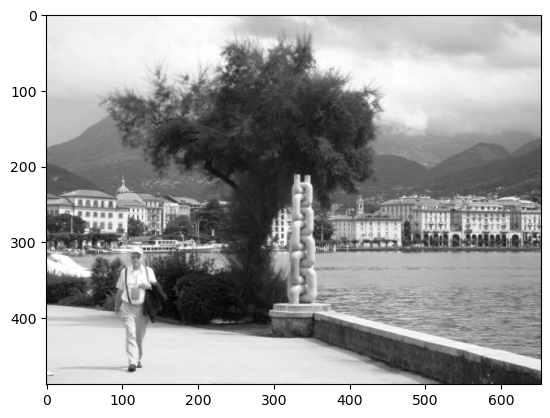

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

imgplot = plt.imshow(img, cmap='gray')

Постройте сингулярное разложение этой матрицы.

In [63]:
from numpy.linalg import svd

U, S, VT = svd(img, full_matrices=False)

**1. [0.1 балла]** Нарисуйте график диагональных элементов матрицы $\Sigma$:

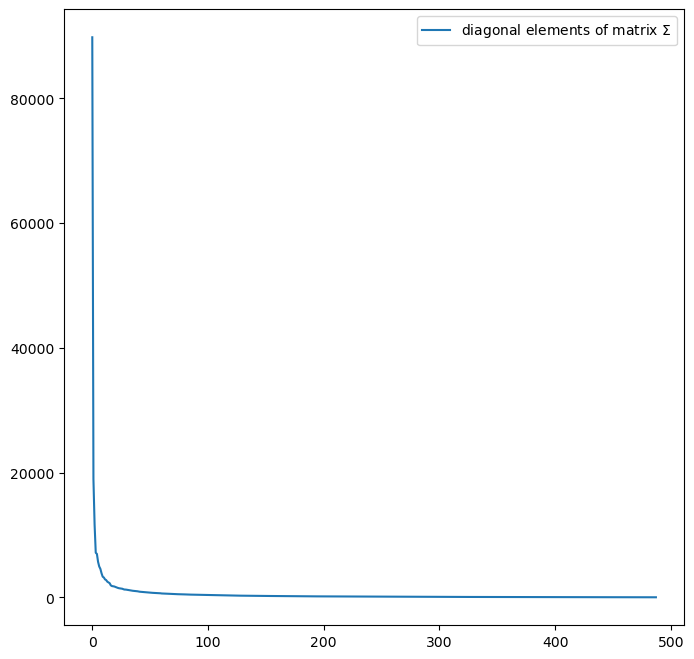

In [64]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
plt.figure(figsize=(8, 8))
plt.plot(S, label='diagonal elements of matrix $\Sigma$')
plt.legend();

Кажется, что они убывают достаточно быстро и есть надежда, что первые несколько компонент дадут картинку, близкую к исходной.

**Важно:** при визуализации различных компонент в этом задании используйте только матричные операции. В частности, избегайте циклов, функций `map` и `reduce`, а также специальных функций, находящих суммы компонент.

**2. [0.1 балла]** Визуализуйте первую компоненту ранга 1. Ожидали ли Вы увидеть именно это? Поясните.

In [65]:
# Напишем функцию, которая находит сумму компонент от х до у ранга 1:
def components_of_matrix(x,y):
    U1 = U[:,range(x,y)]
    S1=(np.diag(S))[x:y,x:y]
    VT1 = VT[range(x,y),:]
    return U1@S1@VT1

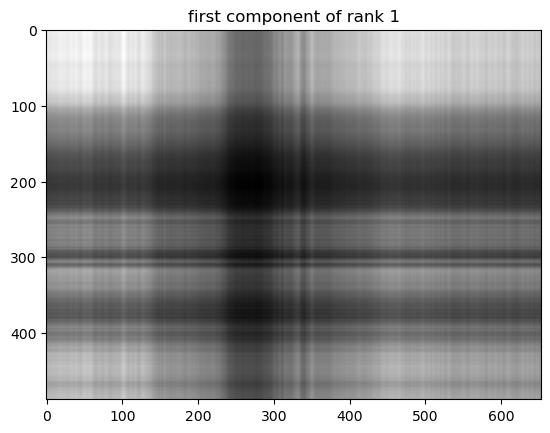

In [66]:
# Визуализируем первую компоненту:
fig, axs = plt.subplots()
axs.imshow(components_of_matrix(0,1), cmap='gray')
axs.set_title('first component of rank 1');


Я ожидала увидеть примерно такую картину, тк первая компонента вносит наибольший вклад в картинку по сравнению с другими ($\sigma_1\geqslant\sigma_2\geqslant\ldots\geqslant0$), следовательно, картинка должна была получиться достаточно яркой.
\
Но при этом первой компоненты недостаточно для восстановления объектов на изображении, следовательно, ее визуализация не будет напоминать начальное фото. 

**3. [0.5 балла]** Визуализуйте суммы компонент ранга 1 с первой по двадцатую, с первой по пятидесятую, с двадцатой по сотую, с двадцатой по последнюю. Сделайте выводы.

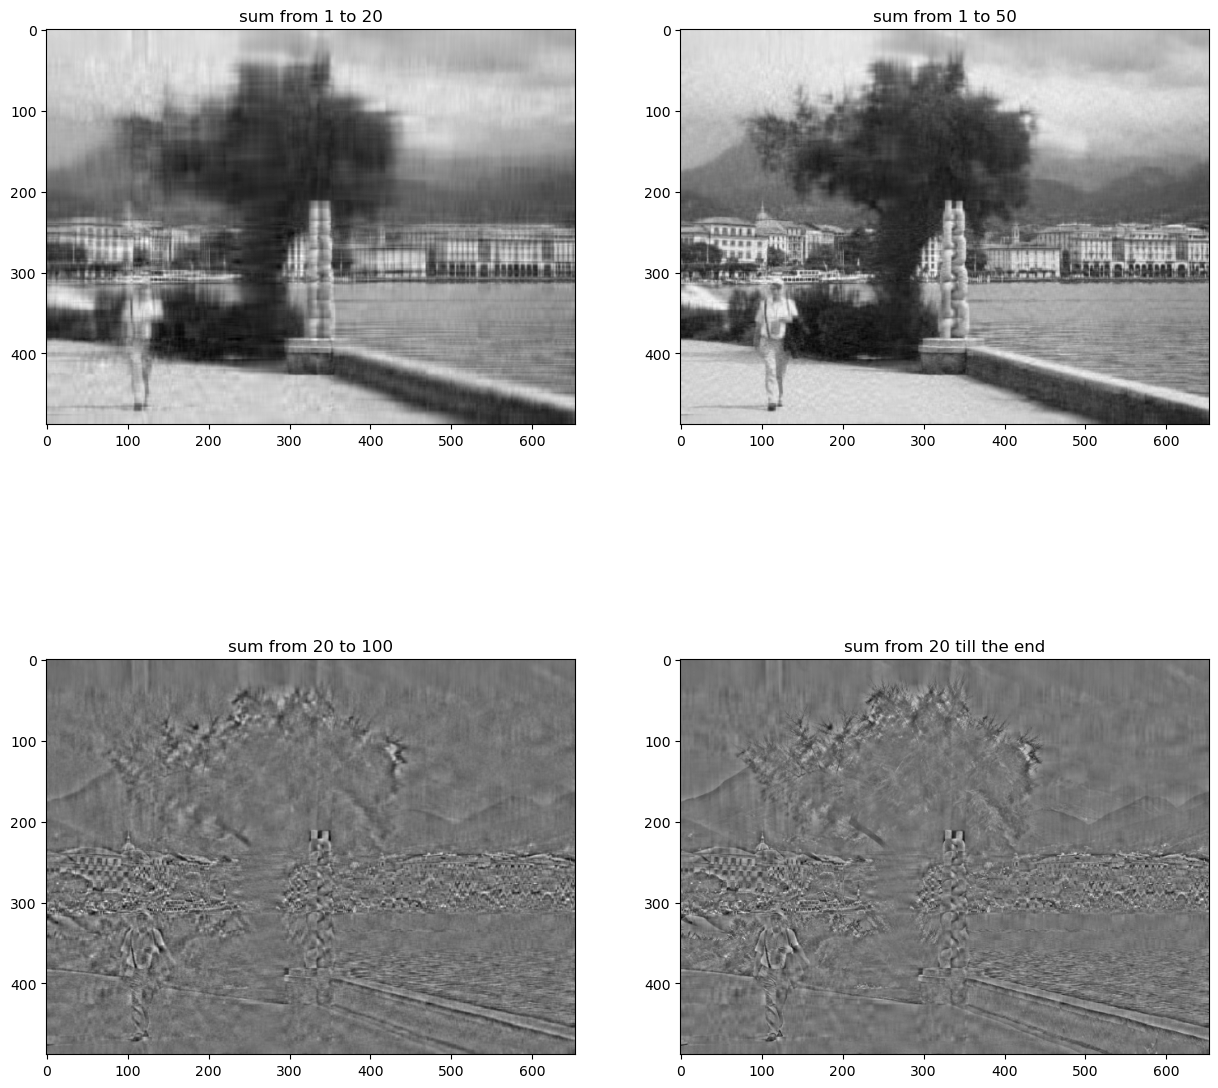

In [7]:
fig, axs = plt.subplots(2,2,figsize=(15, 15))
axs[0,0].imshow(components_of_matrix(0,20), cmap='gray')
axs[0,0].set_title('sum from 1 to 20');

axs[0,1].imshow(components_of_matrix(0,50), cmap='gray')
axs[0,1].set_title('sum from 1 to 50');

axs[1,0].imshow(components_of_matrix(20,100), cmap='gray')
axs[1,0].set_title('sum from 20 to 100');

axs[1,1].imshow(components_of_matrix(20,S.shape[0]), cmap='gray')
axs[1,1].set_title('sum from 20 till the end');

Заметим, что картинки, которые полученные визуализацией компонент, начиная с первой, более похожи на исходный рисунок, чем те, которые были получены суммой начиная с 20-ой компоненты. Первые картинки более яркие, но очертания предметов на них менее четкие. Таким образом, можно сделать вывод, что первые компоненты отвечают за яркость картинки, а последующие - за четкость предметов на ней.

**4. [0.35 балла]** Как Вам кажется, какие компоненты нужно взять для достаточно хорошего восстановления исходного изображения? Аргументируйте свой ответ. Не забудьте визуализировать сумму выбранных компонент.

Для начала отметим, что в первую очередь мы будем брать компоненты с наименьшим номером. Тк сигмы отсортированы по невозрастанию, следовательно, чем меньше номер компоненты, тем больший вклад она вносит в визуальную составляющую картинки. При этом, мы должны взять такое количество компонент, чтобы четкость картинки была достаточно высокой.
На графике видно, что начиная примерно с 115-120 компоненты четкость фото будет падать не сильно. (картинки уже будут достаточно похожи)

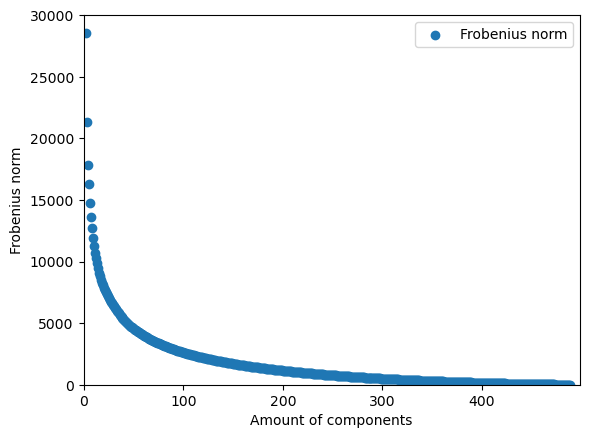

In [73]:
#Для наглядности посчитаем норму Фробениуса:

plt.scatter(np.arange(1, S.shape[0] + 1, 1), np.flip(np.sqrt(np.cumsum(np.flip(S)**2))), label='Frobenius norm')
plt.ylabel('Frobenius norm')
plt.xlabel('Amount of components')
plt.xlim(0, S.shape[0] + 10)
plt.ylim(0, 30000)
plt.legend();

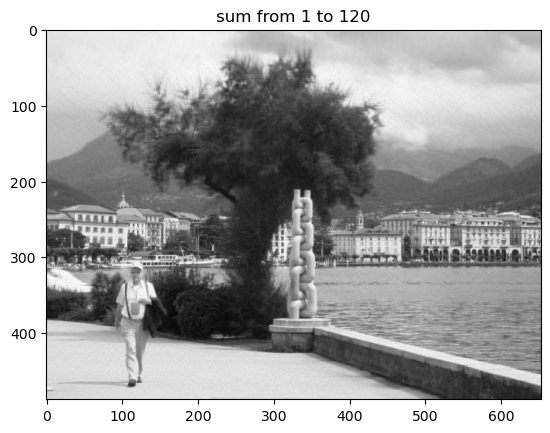

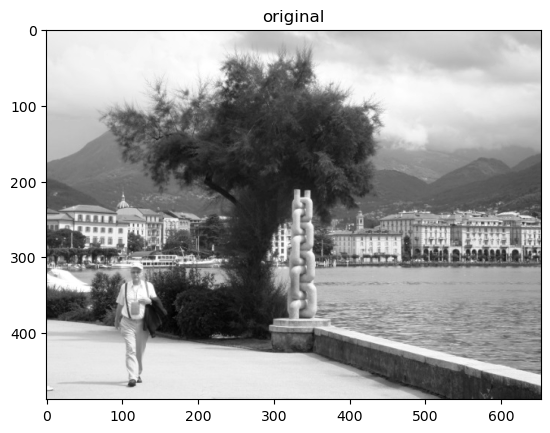

In [8]:
fig, axs1 = plt.subplots()
axs1.imshow(components_of_matrix(0,120), cmap='gray')
axs1.set_title('sum from 1 to 120');
fig, axs2 = plt.subplots()
axs2.imshow(img, cmap='gray', label = 'original')
axs2.set_title('original');

**5. [0.15 балла]** Во сколько раз меньше памяти (теоретически) потребуется для хранения нового изображения по сравнению с исходным?

Исходная матрица занимает $m*n$ памяти, а новая матрица - $m*k + k+ k*n$. 
Подставив значения, получим, что количество затрачиваемой памяти уменьшится в $\frac{m*n}{m*k + k+ k*n} = \frac{488*653}{120(488+653+1)} = 2.3$ раза.

**6. [0.25 балла]** Подсчитайте, сколько в действительности места в памяти компьютера занимают исходная матрица и компоненты её сингулярного разложения. Согласуется ли этот результат с ответом предыдущего пункта? Сделайте выводы.

In [9]:
#Размер исходной матрицы:
sys.getsizeof(img)

2549432

In [10]:
#Размер новой матрицы:
x=0
y=120
sys.getsizeof(U[:,range(x,y)]) + sys.getsizeof((np.diag(S))[x:y,x:y]) + sys.getsizeof(VT[range(x,y),:])

627240

Получается, что в действительности размер изображения сократился не в 2.3, а в 4 раза. Результат отличается от предыдущего пункта, тк компьютер может оптимизировать хранение этих матриц. 

### Задание 2. Геометрия SVD. Визуализация данных с помощью SVD

**Геометрический смысл SVD**

Допустим, что у нас есть выборка $x_1,\ldots,x_m\in\mathbb{R}^n$. Запишем её в матрицу объекты-признаки

$$X = \begin{pmatrix}
x_{11} & \ldots & x_{1n}\\
\vdots & & \vdots\\
x_{m1} & \ldots & x_{mn}
\end{pmatrix}$$

(строки — объекты, столбцы — признаки) и сделаем SVD-разложение: $X = U\Sigma V^T$. Его можно интерпретировать следующим образом:

$$X = U\Sigma\cdot V^T,$$

где $U\Sigma$ — это матрица объекты-признаки для тех же объектов, но в новых признаках, полученных из исходных с помощью линейного преобразования $V$ (напоминаем, что умножение на матрицу справа соответствует преобразованию столбцов). Попробуем понять, чем замечательны эти признаки.

Рассмотрим матрицу $X^TX = V\Sigma^2V^T$. Легко видеть, что это матрица Грама системы столбцов матрицы $X$; иными словами, в ней записаны скалярные произведения векторов различных признаков. Из лекций вы знаете, что $\sigma_1^2$, квадрат первого сингулярного числа, это наибольшее собственное значение матрицы $X^TX$, а $v_1$, первый столбец матрицы $V$, — это соответствующий собственный вектор. Можно показать, что

$$\sigma_1 = \mathrm{max}_{w}\frac{|Xw|}{|w|} = \mathrm{max}_{|w| = 1}\left(|Xw|\right).$$

Попробуем осознать физический смысл этой штуки. Напомним, что строки матрицы $X$ — это координаты объектов $x_1,\ldots,x_m$ в пространстве признаков. Произведение $Xw$ — это вектор из значений на тех же самых объектах некоторого нового признака, являющегося линейной комбинацией исходных с коэффициентами $w_1,\ldots,w_n$:

$$Xw = w_1\begin{pmatrix} x_{11}\\ \ldots \\ x_{m1}
\end{pmatrix} + w_2\begin{pmatrix} x_{12}\\ \ldots \\ x_{m2}
\end{pmatrix} + \ldots + w_n\begin{pmatrix} x_{1n}\\ \ldots \\ x_{mn}
\end{pmatrix}$$

Соответственно, $|Xw|^2$ — это квадрат длины вектора, составленного из значений нового признака.

Таким образом, первому сингулярному значению $\sigma_1$ отвечает такой признак, у которого сумма квадратов значений максимальна, то есть признак, принимающий, условно говоря, самые большие значения.

Резюмируя, мы можем сказать, что сингулярное разложение делает следующее:
- находит новый признак (новое направление) вдоль которого "дисперсия"$^1$ максимальна;
- в ортогональной ему плоскости находит признак, вдоль которого "дисперсия" максимальна;
- и так далее.

---
$^1$ настоящая выборочная дисперсия с точностью до числового множителя была бы равна $|Xw - \overline{Xw}|^2$, где $\overline{Xw} = \frac1m\sum_{i=1}^m(Xw)_i$ — среднее значения признака.

**1. [1.25 балла]** Пусть $\sigma_1$ — старшее сингулярное число матрицы $X$ размера $m \times n$. Покажите, что верна цепочка равенств
$$\sigma_1 = \mathrm{max}_{w}\frac{|Xw|}{|w|} = \mathrm{max}_{|w| = 1}~|Xw| = \mathrm{max}_{|u|=|v| = 1}~|u^T Xv|.$$

**Подсказки:**
* при доказательстве равенства $\sigma_1 = \mathrm{max}_{w}\frac{|Xw|}{|w|}$ выразите вектор $w$ как $\alpha\cdot v$, где $|v|=1$, и рассмотрите описанное выражение
* при доказательстве равенства $\sigma_1 = \mathrm{max}_{|w| = 1}~|Xw|$ представьте $w$ в виде линейной комбинации ортонормированного базиса, состоящего из собственных векторов оператора $X^TX$, и внимательно посмотрите на произведение $wX^TXw$
* при доказательстве равенства $\sigma_1 = \mathrm{max}_{|u|=|v| = 1}~|u^T Xv|$ разложите матрицу $X$ в SVD-разложение, а векторы $u$ и $w$ представьте в виде линейной комбинации векторов, являющихся столбцами матриц $U$ и $V$.

Докажем второе равенство:
\
$\mathrm{max}_{w}\frac{|Xw|}{|w|} = \frac{\alpha|X\cdot v|}{\alpha|v|}=\frac{|Xv|}{|v|}=|Xv| = \mathrm{max}_{|w| = 1}~|Xw|$ (последнее равенство верно тк |v| = 1)
\
\
Докажем первое равенство: 
    Возьмем ортонормированный базис $\mathbb{v} = v_1,...,v_n$, где каждый вектор - это собственный вектор линейного оператора $X^TX$. 
\
Пусть $w=c_1v_1+...+c_nv_n, |w| = 1$. 
\
Тк $\mathbb{v}$ - ортонормированный, $|w|^2 = c_1^2+...+c_n^2=1$. 
\
Рассмторим выражение
$$|Xw|^2=w^TX^TXw=w^T(X^TXw)=w^T(c_1 v_1\sigma_1^2+...+c_nv_n\sigma_n^2)=c_1^2\sigma_1^2+...+c_n^2\sigma_n^2$$
\
\
\
Докажем третье равенство: 
\
Разложим Х в СВД: $X=U\Sigma V^T$
\
$U=(u_1,...,u_n),\:V=(v_1,...,v_m)$.
\
Пусть $u=a_1u_1+...+a_mu_m$ и $v=b_1v_1+...+b_nv_n$ - ортонормированные векторы. Тогда, $a_1^2+...+a_m^2=1$ и $b_1^2+...+b_n^2=1$. 
\
Посчитаем $u^TXv=u^TU\Sigma V^Tv$:
$$u^TU=(a_1u_1+...+a_mu_m)U=(a_1|u_1|,...,a_m|u_m|)=(a_1,...,a_m)$$ (тк все слагаемые кроме i-го - нули)

$$V^Tv=V^T(b_1v_1+...+b_nv_n)=(b_1|v_1|,...,b_n|v_n|)^T=\begin{pmatrix}
    b_1\\\vdots\\b_n
\end{pmatrix}$$ (аналогично, все слагаемые кроме i-го - нули)
\
\
Вернемся ко всей матрице:
$$
u^TU\Sigma V^Tv=(a_1,...,a_m)\cdot
diag(\sigma_1,\sigma_2, ... \sigma_r)\cdot
\begin{pmatrix}
    b_1\\\vdots\\b_n
\end{pmatrix}=
(\sigma_1a_1,...,\sigma_na_m)\cdot
\begin{pmatrix}
    b_1\\\vdots\\ b_n
\end{pmatrix}=a_1b_1\sigma_1+...+a_rb_r\sigma_r
$$
Тогда, максимум равен $\sigma_1$, тк $\sigma_1$ - наибольшее из всех $\sigma$ (а $a_1=b_1=1$ в силу  ортонормированности) и достигается при $u=u_1,\:v=v_1$


**2. [0.75 балла]** Рассмотрим матрицу $A = (a_{ij})$ размера $n \times n$, такую что $a_{ij} = \sin i \cdot \cos j$, причём нумерация ведётся с нуля. Найдите $r = \text{rk}A$ (можете считать, что $n > 1$), а также разложение (Compact SVD) $A=U \Sigma V^T$, где $U$ и $V$ — матрицы с ортонормированными столбцами размера $n\times r$, а $\Sigma = \mathrm{diag}(\sigma_1,\ldots,\sigma_r)$ — диагональная матрица размера $r\times r$, в которой $\sigma_1\geqslant\ldots\geqslant\sigma_r > 0$. 

Тк sin(0) = 0 => в первой строке матрицы А нули.
\begin{pmatrix}
    0 & ... & 0\\
    sin(1) & ... &  sin(1)cos(n)\\
    sin(2) & ... & sin(2)cos(n)\\
    \vdots & \ddots & \vdots\\
    sin(n) & ... &  sin(n)cos(n)
\end{pmatrix}
\
Нетрудно заметить, что все строки матрицы являются линейнозависимыми, тк получаются домножением на соответствующее значение синуса. Следовательно, применяя элементарные преобразования, приведем матрицу к ступенчатому виду методом Гаусса и убедимся что матрица имеет ранг 1.
\
Тогда, $\Sigma=diag(\sigma)$
\
Тк в матрице $\Sigma$ все элементы кроме $a_11$ равны нулю, разложение выглядит следующим образом:
\
$A=U \Sigma V^T =
\begin{pmatrix}
    0\\
    sin(1)\\
    sin(2)\\
    \vdots\\
    sin(n)
\end{pmatrix}\cdot
\begin{pmatrix}
    \sigma
\end{pmatrix}\cdot
\begin{pmatrix}
    0 & cos(1) ... & cos(n)\\
\end{pmatrix}
$
\
Найдем длину вектора-сроки и столбца:
$|U| = \sqrt(\sum sin(i))$
\
$|V|  = \sqrt(\sum cos(i)) $
\
Ортонормируем базисы и вынесем множитель за пределы матрицы:
\
$
\frac{1}{\sqrt(\sum sin(i))\sqrt(\sum cos))}
\begin{pmatrix}
    0\\
    sin(1)\\
    sin(2)\\
    \vdots\\
    sin(n)
\end{pmatrix}\cdot
\begin{pmatrix}
    \sigma
\end{pmatrix}\cdot
\begin{pmatrix}
    0 & cos(1) ... & cos(n)\\
\end{pmatrix}
= A
$
\
Отсюда $\sigma =\sqrt{\sum\limits_{i}sin(i)}\sqrt{\sum\limits_{i}cos(i)}) \Rightarrow \Sigma = diag(\sqrt(\sum sin(i))\sqrt(\sum cos(i)))$

**3. [0.5 балла]** Рассмотрим полное сингулярное разложение $A = U \Sigma V^T$ для матрицы размера $m \times n$, такой что $\text{rk}A=r$. Определим также линейное отображение $\mathcal{A} \colon \mathbb{R}^n \to \mathbb{R}^m$, которое действует умножением на матрицу $A$. Покажите, что $\text{Im}\mathcal{A} = \langle u_1, \ldots, u_r \rangle$, а $\text{Ker}\mathcal{A} = \langle v_{r+1}, \ldots, v_n \rangle$.

$U^T=U^{-1}$, $V^T=V^{-1}$ тк $U$ и $V$ ортогональны, следовательно, $U^T=U^{-1}$ и $V^T=V^{-1}$. 
\
Домножив $A$ на $U^{-1}$ слева и на $V$ справа, получим что $U^{-1}AV=\Sigma$. 
Заметим, что $\Sigma$ - матрица линейного отображения в новых базисах $\mathbb{v}=\mathbb{e}\cdot V$ и $\mathbb{u}=\mathbb{f}\cdot U$. (вспомним матрицу перехода между базисами)

$\Sigma=diag(\sigma_1,...,\sigma_r)$, таким образом $\mathcal{A}(v_i)=\sigma_iu_i$.
\
Следовательно, в базисах $\mathbb{v}=\mathbb{e}\cdot V$ и $\mathbb{u}=\mathbb{f}\cdot U$, $\mathcal{A}(v_i)\neq 0$ для $i\leqslant r$ и $\mathcal{A}v_i=0$ для $i>r$. 


Таким образом, $\ker\mathcal{A}=\langle v_{r+1}, \ldots, v_n \rangle$.
\
Заметим, что $v=\alpha_1v_1+...+\alpha_nv_n$ принадлежит ядру тогда и только тогда, когда $\mathcal{A}(\alpha_1v_1+...+\alpha_nv_n)=\mathcal{A}\alpha_1v_1+...+\mathcal{A}\alpha_nv_n=\alpha_1\sigma_1 u_1+...+\alpha_r\sigma_ru_r+0+...+0=0$.
 \
Так как $u_1,...,u_r$ - линейно независимы $\Rightarrow$ $\alpha_i=0$ при любом $i\leqslant r$. Получаем, что $v=\alpha_{r+1}v_{r+1}+...+\alpha_nv_n\in\langle v_{r+1}, \ldots, v_n \rangle$.


Значит, $\text{Im}\mathcal{A}=\langle \mathcal{A}(v_1), \ldots, \mathcal{A}(v_n) \rangle=\langle \sigma_1 u_1, \ldots, \sigma_r u_r,0,\ldots, 0\rangle=\langle u_1, \ldots, u_r \rangle$.

**4. [0.75 балла]** Рассмотрим матрицу $A$ размера $m \times n$, такую что $m \geqslant n$ и столбцы $A$ линейно независимы. Найдите матрицу $\Sigma$ из полного сингулярного разложения для матрицы $P = A(A^T A)^{-1} A^T$.

Начнем расписывать разложение матрицы А в свд:$A=U\Sigma V^T$
\
Отметим, что столбцы А - ЛНЗ => rkA = n. Тогда, по определению SVD $rk \Sigma = n$, следовательно, $\Sigma^T\Sigma$ - квадратная матрица $n*n$ с рангом n => она обратима.
\
$A(A^T A)^{-1}A^T
=U\Sigma V^T(V\Sigma^TU^T\cdot U\Sigma V^T)^{-1}V\Sigma^TU^T
=U\Sigma V^T(V\Sigma^T\Sigma V^T)^{-1}V\Sigma^TU^T=$$
$$=U\Sigma V^T(V^T)^{-1}(\Sigma^T\Sigma)^{-1}(V)^{-1}V\Sigma^TU^T=$$
$$=U\Sigma(\Sigma^T\Sigma)^{-1}\Sigma^TU^T$
\
Рассмотрим произведение $\Sigma(\Sigma^T\Sigma)^{-1}\Sigma^T$:
\
$\Sigma(\Sigma^T\Sigma)^{-1}\Sigma^T = \begin{pmatrix}
    \sigma_1 & ... & 0\\
     \vdots\\
    0 & ... & \sigma_n\\
    0 & ... & 0\\
    \vdots  & \vdots\\
    0 & ... & 0
\end{pmatrix}\cdot
\left[
\begin{pmatrix}
    \sigma_1 & ... & 0 & 0 & ... & 0\\
    \vdots &  \vdots\\
    0 & ... & \sigma_n & 0 & ... & 0\\
\end{pmatrix}\cdot
\begin{pmatrix}
    \sigma_1 & ... & 0\\
    \vdots &  \vdots\\
    0 & ... & \sigma_n\\
    0 & ... & 0\\
    \vdots &  \vdots\\
    0 & ... & 0
\end{pmatrix}
\right]^{\:\:(-1)}\cdot
\begin{pmatrix}
    \sigma_1 & ... & 0 & 0 & ... & 0\\
    \vdots &\vdots\\
    0 & ... & \sigma_n & 0 & ... & 0\\
\end{pmatrix}$
\
(надеюсь, вы простите меня за такие матрицы, в этот момент у меня перестал нормально работать тех)
\
$=diag (\sigma_1...\sigma_n)*((diag (\sigma_1...\sigma_n)^T*diag (\sigma_1...\sigma_n))^{-1}*diag (\sigma_1...\sigma_n)^T = diag (\sigma_1...\sigma_n)*(diag (\sigma_1^2...\sigma_n^2)^{-1}*diag (\sigma_1...\sigma_n)^T = diag (\sigma_1...\sigma_n)*(diag(\frac{1}{\sigma_1^2}...\frac{1}{\sigma_n^2})*diag (\sigma_1...\sigma_n)^T = (diag(\frac{1}{\sigma_1}...\frac{1}{\sigma_n})*diag (\sigma_1...\sigma_n)^T = diag(1,...1,0,...0)$ (количество единиц - n)
\
Итого, искомая матрица - это диагональная матрица $m*m$ с n-ым количеством единиц на диагонали, которые находятся в верхнем $n*n$ блоке.

**Визуализация данных с помощью SVD**

Выше мы обсудили, что первые из "новых" признаков — это признаки, значения которых, скажем так, наиболее разнообразны. Зачастую (хотя и не всегда) именно они несут в себе наиболее важные черты датасета. И если взять два-три первых, то датасет можно нарисовать и посмотреть на него — и, возможно, обнаружить какую-то структуру.

С помощью функции `dsklearn.datasets.load_digits()` загрузите датасет рукописных цифр [MNIST](http://yann.lecun.com/exdb/mnist/). В нём есть несколько атрибутов; вам сейчас будут нужны `digits.data` (`np.array`, строки которого — это вытянутые в одну строку значения пикселей) и `digits.target` (в них записаны соответствующие цифры).

8


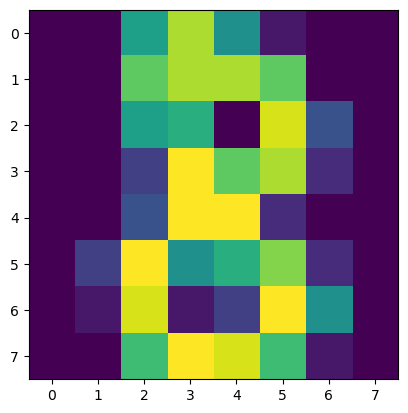

In [11]:
from sklearn import datasets

digits = datasets.load_digits()

print(digits.target[8])

plt.imshow(digits.data[8].reshape((8,8)));

**5. [0.1 балла]** Примените к матрице `digits.data` сингулярное разложение.

In [12]:
U_d, S_d, VT_d = svd(digits.data, full_matrices=False)

**6. [0.65 балла]** Визуализируйте данные, спроецировав их на такую плоскость, чтобы координаты точек соответствовали первым двум новым признакам. Не забудьте покрасить точки, отвечающие различным цифрам, в разные цвета (если Вы любите красивые визуализации, разберитесь, как вместо точек рисовать маленькие цифры).

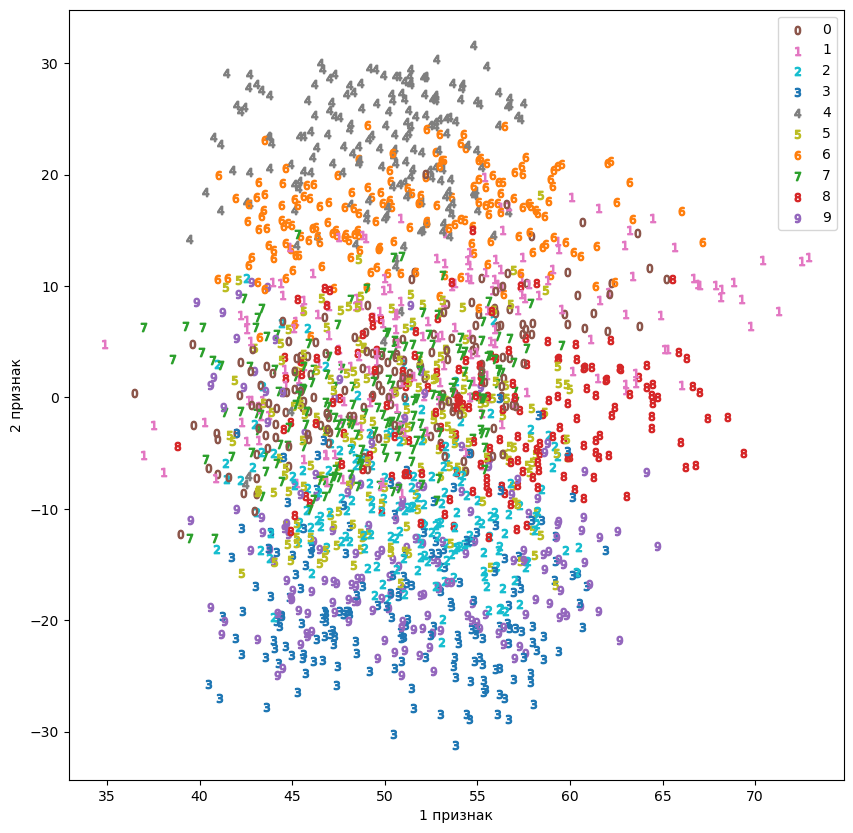

In [14]:
projection = (U_d@np.diag(S_d))[:,range(0,2)] # спроецировали данные на плоскость для первых двух признаков

colors = [ 'tab:brown', 'tab:pink', 'tab:cyan','tab:blue','tab:gray', 'tab:olive', 'tab:orange', 'tab:green', 'tab:red', 'tab:purple']
plt.figure(figsize=(10, 10))

for i, a, b in zip(range(projection.shape[0]), projection[:, 0], projection[:, 1]):
    plt.scatter(a, b, marker=r'$' + str(digits.target[i]) + '$', color=colors[digits.target[i]])
plt.legend(['0', '1', '2', '3', '4', '5', '6', '7', '8', '9'])
plt.xlabel("1 признак")
plt.ylabel("2 признак");

**7. [0.25 балла]** Теперь вычтите из каждого признака его среднее значение, снова сделайте SVD и нарисуйте разноцветные точки.

In [15]:
digits_copy = digits.data.copy()
for i in range(digits.data.shape[1]):
    digits_copy[:,i] = digits_copy[:,i] - np.mean(digits.data[:,i])
U_d_copy, S_d_copy, VT_d_copy = svd(digits_copy, full_matrices=False)

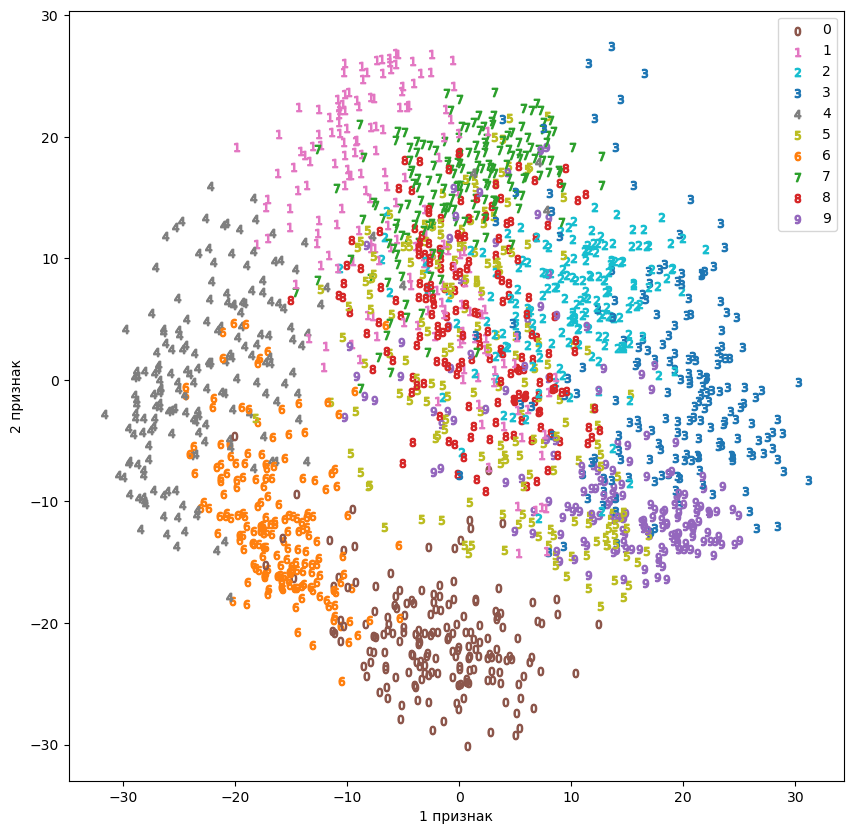

In [16]:
projection = (U_d_copy@np.diag(S_d_copy))[:,range(0,2)] # спроецировали данные на плоскость для первых двух признаков

colors = [ 'tab:brown', 'tab:pink', 'tab:cyan','tab:blue','tab:gray', 'tab:olive', 'tab:orange', 'tab:green', 'tab:red', 'tab:purple']
plt.figure(figsize=(10, 10))

for i, a, b in zip(range(projection.shape[0]), projection[:, 0], projection[:, 1]):
    plt.scatter(a, b, marker=r'$' + str(digits.target[i]) + '$', color=colors[digits.target[i]])
plt.legend(['0', '1', '2', '3', '4', '5', '6', '7', '8', '9'])
plt.xlabel("1 признак")
plt.ylabel("2 признак");

**8. [0.25 балла]** Сравните выполненные Вами в двух предыдущих пунктах визуализации. Чем последняя выгодно отличается от первой?

Во втором случае каждая точка, соответствующая определенному числу, лежит в своем диапазоне, который существенно меньше диапазона из первого примера, благодаря чему данные выглядят на картинке более наглядно. 
\
Более того, во втором случае координаты точек по оси первого признака в большем количестве лежат в районе нуля, что является более удобным для работы с данными.

**9. [1 балл]** Сравните работу SVD с другим методом понижения размерности: [случайными гауссовскими проекциями](http://scikit-learn.org/stable/modules/generated/sklearn.random_projection.GaussianRandomProjection.html).

*Комментарий: Эксперименты без выводов, объясняющих полученные результаты, не оцениваются. Для получения полного балла за этот пункт постарайтесь провести как можно больше разноплановых экспериментов.*

In [1]:
from sklearn.random_projection import GaussianRandomProjection

transformer_2 = GaussianRandomProjection(n_components=2)
transformer_7 = GaussianRandomProjection(n_components=7)

X_new_2 = transformer_2.fit_transform(digits.data)
X_new_7 = transformer_7.fit_transform(digits.data)


colors = [ 'tab:brown', 'tab:pink', 'tab:cyan','tab:blue','tab:gray', 'tab:olive', 'tab:orange', 'tab:green', 'tab:red', 'tab:purple']

fig, (ax_1, ax_2) = plt.subplots(2, 1, figsize = (10, 14))
                       
for i, a, b in zip(range(X_new_2.shape[0]), X_new_2[:, 0], X_new_2[:, 1]):
    ax_1.scatter(a, b, marker=r'$' + str(digits.target[i]) + '$', color=colors[digits.target[i]])
ax_1.legend(['0', '1', '2', '3', '4', '5', '6', '7', '8', '9'])
ax_1.set_title('Метод с 2 размерностями')
ax_1.set_xlabel("1 признак")
ax_1.set_ylabel("2 признак");

for i, a, b in zip(range(X_new_7.shape[0]), X_new_7[:, 0], X_new_7[:, 1]):
    ax_2.scatter(a, b, marker=r'$' + str(digits.target[i]) + '$', color=colors[digits.target[i]])
ax_2.legend(['0', '1', '2', '3', '4', '5', '6', '7', '8', '9'])
ax_2.set_title('Метод с 7 размерностями')
ax_2.set_xlabel("1 признак")
ax_2.set_ylabel("2 признак");

NameError: name 'digits' is not defined

Сделаем случайные гауссовские проекции на усредненных данных

In [ ]:
X_new_centered_2_1 = transformer_2.fit_transform(digits_copy.data)
X_new_centered_2_2 = transformer_2.fit_transform(digits_copy.data)

X_new_centered_7_1 = transformer_7.fit_transform(digits_copy.data)
X_new_centered_7_2 = transformer_7.fit_transform(digits_copy.data)


colors = [ 'tab:brown', 'tab:pink', 'tab:cyan','tab:blue','tab:gray', 'tab:olive', 'tab:orange', 'tab:green', 'tab:red', 'tab:purple']

fig, (ax_1, ax_2, ax_3, ax_4) = plt.subplots(4, 1, figsize = (10, 20))
                       
for i, a, b in zip(range(X_new_centered_2_1.shape[0]), X_new_centered_2_1[:, 0], X_new_centered_2_1[:, 1]):
    ax_1.scatter(a, b, marker=r'$' + str(digits.target[i]) + '$', color=colors[digits.target[i]])
ax_1.legend(['0', '1', '2', '3', '4', '5', '6', '7', '8', '9'])
ax_1.set_title('Метод с 2 размерностями, 1-ая итерация')
ax_1.set_xlabel("1 признак")
ax_1.set_ylabel("2 признак");

for i, a, b in zip(range(X_new_centered_2_2.shape[0]), X_new_centered_2_2[:, 0], X_new_centered_2_2[:, 1]):
    ax_2.scatter(a, b, marker=r'$' + str(digits.target[i]) + '$', color=colors[digits.target[i]])
ax_2.legend(['0', '1', '2', '3', '4', '5', '6', '7', '8', '9'])
ax_2.set_title('Метод с 2 размерностями, 2-ая итерация')
ax_2.set_xlabel("1 признак")
ax_2.set_ylabel("2 признак");

for i, a, b in zip(range(X_new_centered_7_1.shape[0]), X_new_centered_7_1[:, 0], X_new_centered_7_1[:, 1]):
    ax_3.scatter(a, b, marker=r'$' + str(digits.target[i]) + '$', color=colors[digits.target[i]])
ax_3.legend(['0', '1', '2', '3', '4', '5', '6', '7', '8', '9'])
ax_3.set_title('Метод с 7 размерностями, 1-ая итерация')
ax_3.set_xlabel("1 признак")
ax_3.set_ylabel("2 признак");

for i, a, b in zip(range(X_new_centered_7_2.shape[0]), X_new_centered_7_2[:, 0], X_new_centered_7_2[:, 1]):
    ax_4.scatter(a, b, marker=r'$' + str(digits.target[i]) + '$', color=colors[digits.target[i]])
ax_4.legend(['0', '1', '2', '3', '4', '5', '6', '7', '8', '9'])
ax_4.set_title('Метод с 7 размерностями, 2-ая итерация')
ax_4.set_xlabel("1 признак")
ax_4.set_ylabel("2 признак");

Заметим следующее:

$\bullet$ Даже на отцентрированных данных метод показывает результаты хуже, чем SVD;

$\bullet$ Метод работает заметно быстрее на том же объеме данных, чем SVD;

$\bullet$ Т.к. метод использует проекции на случайно сгенерированные матрицы, поэтому при каждом запуске результат работы метода будет отличаться, в отличие от SVD:

### Задание 3. Когда SVD не сработает

**Disclaimer**

Цель этого задания — познакомить Вас не только с геометрическим смыслом сингулярного разложения, но и перекинуть очередной мостик между линейной алгеброй и анализом данных. К сожалению, на том берегу Вас встретят разные пока неизведанные понятия; мы постараемся по возможности дать какие-то определения, но, конечно, нет никакой возможности изложить на этих страницах полный курс теории вероятностей. Поэтому какие-то вещи останутся недосказанными или необоснованными; если Вам будет интересно, не стесняйтесь читать соответствующую литературу или хотя бы Википедию, а если нет, то мы надеемся, что хотя бы наглядное представление у Вас сформируется. В любом случае, нам хотелось бы, чтобы воспоминания об этом всколыхнулись в ваших головах, когда Вы будете это всё изучать в курсе по теории вероятностей.

Но начнём мы с того, что обсудим ситуацию, в которой SVD работает лучше всего: а именно, со случая, когда данные распределены нормально.

**Что такое плотность вероятности**

В дальнейшем Вам достаточно часто придётся сталкиваться со *случайными величинами*. Мы не будем сейчас пытаться строго определить, что это такое (для этого у вас будет целый курс по теории вероятностей), а остановимся только на одном его аспекте.

Если случайная величина $X$ принимает лишь конечное (или счётное) число значений $x_1,x_2,\ldots$, то чтобы задать её, достаточно описать, с какой вероятностью $X$ равна $x_i$: 

$$p_i = P(X = x_i)$$

таким образом, чтобы $\sum_ip_i = 1$. Если же $X$ принимает значения на каком-либо отрезке или на всей числовой прямой, то так уже не получится: в этом случае вероятность того, что $X$ равна какому-то конкретному $x_0$, обычно равна нулю. Как правило, заменой вероятностей $p_i$ служит *функция плотности распределения* $p(x)$. Смысл её таков:

$$P(\alpha\leqslant X\leqslant\beta) = \int\limits_{\alpha}^{\beta}p(x)dx$$

(в левой части стоит вероятность того, что значение $X$ лежит на отрезке $[\alpha,\beta]$).

Таким образом, функция $p(x)$ действительно играет роль "плотности": вероятность попасть в отрезок одной и той же длины тем выше, чем больше значения $p(x)$ на нём.

**Нормальное распределение**

Одним из самых важных примеров непрерывных распределений является *нормальное распределение*. Его плотность имеет вид

$$p(x) = \frac1{\sqrt{2\pi\sigma^2}}e^{-\frac{(x - a)^2}{2\sigma^2}}$$

У него есть два параметра:

- $a$ - *математическое ожидание*, имеющее смысл среднего значения и для нормального распределения совпадающее с центром симметрии распределения;
- $\sigma^2$ - *дисперсия*: чем она меньше, тем в большей степени распределение сконцентрировано подле своего математического ожидания

Нормальное распределение с параметрами $a$ и $\sigma^2$ можно кратко обозначать $\mathcal{N}(a, \sigma^2)$.

Чтобы проиллюстрировать это, мы сгененерируем много точек из распределений $\mathcal{N}(2, 0.25)$, $\mathcal{N}(0, 1)$ и $\mathcal{N}(0, 4)$ и по ним в каждом из этих случаев построим аппроксимацию функции плотности распределения. Обратите внимание, что параметр $a$ в `numpy` называется `loc`, $\sigma$ (без квадрата!) — `scale`

In [18]:
import numpy as np
from scipy.interpolate import UnivariateSpline
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns

C:\Users\79636\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\79636\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\79636\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdep

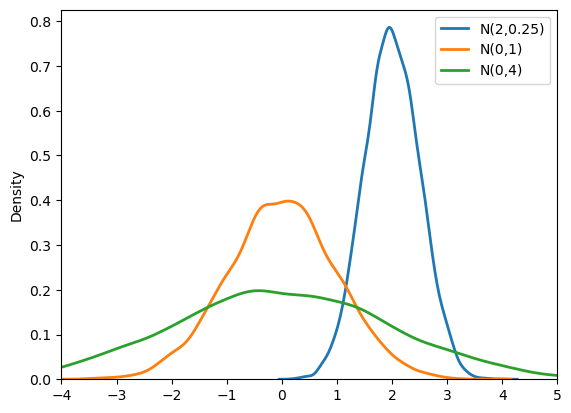

In [19]:
N = 10000
plt.xlim([-4,5])
s = np.random.normal(loc=2, scale=0.5, size=N)   # generate your data sample with N elements
sns.distplot(s, hist=False, kde=True, 
             bins=50,
             kde_kws={'linewidth': 2}, label='N(2,0.25)')

s = np.random.normal(loc=0, scale=1, size=N)   # generate your data sample with N elements
sns.distplot(s, hist=False, kde=True, 
             bins=50,
             kde_kws={'linewidth': 2}, label='N(0,1)')

s = np.random.normal(loc=0, scale=2, size=N)   # generate your data sample with N elements
sns.distplot(s, hist=False, kde=True, 
             bins=50,# color = 'darkblue',
             kde_kws={'linewidth': 2}, label='N(0,4)')

plt.legend()
plt.show()

**Функция плотности распределения в многомерном случае**

Если значения случайной величины $X$ — это многомерные векторы, функция плотности сохраняет примерно тот же смысл: если $\Omega\subseteq\mathbb{R}^n$, то

$$P(X\in\Omega) = \int\limits_{\Omega}p(x)dx$$

**Многомерное нормальное распределение**

Многомерное нормальное распределение определяется также двумя параметрами: *вектором средних* $a$ и положительно определённой *ковариационной матрицей* $\Sigma$; оно имеет плотность

$$p(x) = \frac1{(2\pi)^{n/2}|\Sigma|^{1/2}}e^{-\frac12(x - a)^T\Sigma^{-1}(x - a)}$$

где, напомним, $x$ — вектор из $\mathbb{R}^n$. Компоненты вектора $a$ — это математические ожидания отдельных координат $X$, а на диагонали матрицы $\Sigma$ стоят их *дисперсии* (настоящие, без кавычек). Вне диагонали стоят *ковариации* компонент $X$ (пока вам достаточно понимать, что если они равны нулю, то эти компоненты независимы$^1$).

---
$^1$ Точнее сказать, некоррелированны, однако для компонент многомерного нормального распределения независимость и некоррелированность равносильны (на самом деле редкое и удачное свойство!).

**Несколько фактов**

* Под (n-1)-мерным эллипсоидом будем понимать гиперповерхность в $\mathbb{R}^n$, такую что в некоторой прямоугольной декартовой системе координат её уравнение принимает вид $\sum_{i=1}^n \frac{x_i^2}{r_i^2} = 1$. Поверхности уровня $p(x) = c$ — это эллипсоиды.

*  Пользуясь теоремой о приведении квадратичной формы к главным осям, можно показать, что функция плотности многомерного нормального распределения представляется в виде произведения одномерных нормальных плотностей при переходе в новую систему координат. 
$$p(x)=\frac1{(2\pi)^{n/2}|\Sigma|^{1/2}}e^{-\frac12(x - a)^T\Sigma^{-1}(x - a)}\:\underset{\text{новая система координат}}{\to}\: p(x)=p(x_1)\cdot ...\cdot p(x_n)$$

    В частности, это означает, что с помощью замены координат можно добиться того, чтобы отдельные компоненты были независимы (то есть матрица ковариации $\Sigma$ диагональна).

А мы тем временем продемонстрируем это на конкретном примере, сгенерировав много точек из двумерного нормального распределения с вектором средних $(-1,3)$ и ковариационной матрицей

$$\begin{pmatrix}
1 & \frac32\\
\frac32 & 5
\end{pmatrix}$$

и нарисовав приближённо линии уровня функции плотности.

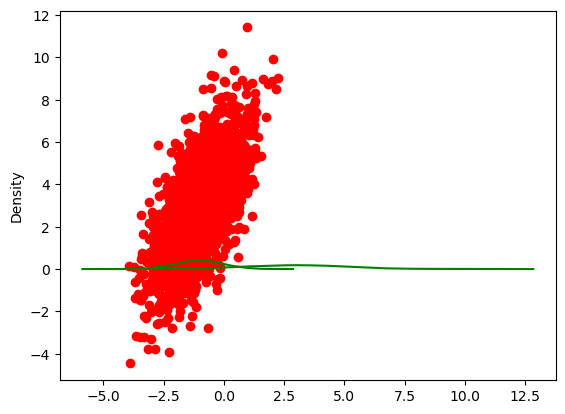

In [20]:
import seaborn as sns
import numpy as np

N = 2000
s = np.random.multivariate_normal(mean=np.array([-1,3]), cov=np.array([[1,1.5],[1.5,5]]), size=N)
plt.scatter(s[:,0], s[:,1], color='red')
sns.kdeplot(s[:,0], fill=False, color='g')
sns.kdeplot(s[:,1], fill=False, color='g');

Как видите, линии уровня весьма напоминают эллипсы (только напоминают, потому что точек у нас всё-таки конечное число).

**1. [0 баллов]** Сгенерируйте выборку из 1000 точек $x_1,\ldots,x_{1000}$ из нормального распределения с вектором средних $a = (0,0)$ и ковариационной матрицей

$$\Sigma = \begin{pmatrix}
1 & -2\\
-2 & 5
\end{pmatrix}.$$

In [21]:
N = 1000
X = np.random.multivariate_normal(mean=np.array([0,0]), cov=np.array([[1,-2],[-2,5]]), size=N)

**2. [0.25 балла]** Сделайте SVD-разложение $X = U\Sigma V^T$. Нарисуйте на плоскости все точки $x_i$ и направления новых признаков. Убедитесь, что направления новых признаков примерно совпадают с направлениями полуосей эллипса, образованного точками.

*Тк матрица V соответствует ортогональному преобразованию плоскости, её столбцы являются направлениями новых признаков*

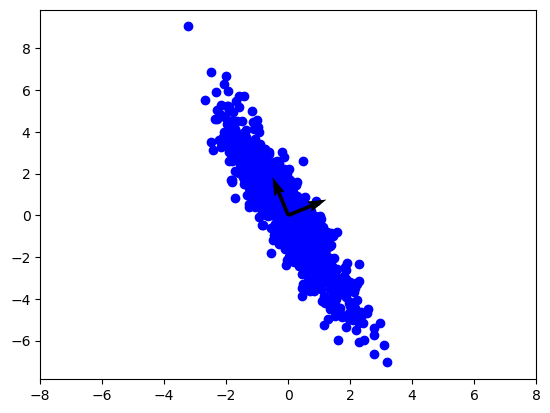

In [52]:
U3,S3, VT3 = svd(X, full_matrices=False)

plt.scatter(X[:,0], X[:,1], color='blue')
plt.quiver([0, 0], [0, 0], VT3.T[0, :], VT3.T[1, :], scale = 12)
plt.xlim((-8,8));

**3. [0.5 балла]** Приведите к главным осям матрицу ковариации (это нужно сделать без привлечения `Python`) и убедитесь, что направления этих осей тоже примерно совпадают с наблюдаемыми направлениями полуосей эллипсоида.

╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟНайдем характеристический многочлен линейненого оператора, заданного матрицей $\Sigma$:
\
$$
\begin{vmatrix}
    1-\lambda & -2\\
    -2 & 5-\lambda
\end{vmatrix}=(1-\lambda)(5-\lambda)-4=\lambda^2-6\lambda+1 = \lambda^2-6\lambda+1 = (\lambda-3-2\sqrt{2})(\lambda-3+2\sqrt{2})
$$
\
\
Найдем собственные значения, решив уравнение, $(\lambda-3-2\sqrt{2})(\lambda-3+2\sqrt{2}) = 0$: Получим, что $\lambda_1 = 3-2\sqrt{2}$, $\lambda_2 = 3+2\sqrt{2}$
\
\
Для каждого собственного значения найдем отвечающий ему собственный вектор:
\
\
1)$\lambda_1 = 3+2\sqrt{2}$:
\
\
$
\begin{pmatrix}
    -2-2\sqrt{2} & -2\\
    -2 & 2-2\sqrt{2}
\end{pmatrix} \rightarrow
\begin{pmatrix}
    1 & -1+\sqrt{2}\\
    0 & 0
\end{pmatrix}$ (подставили $\lambda_1$, привели к УСВ)
\
\
Тогда, $u_1{'} = \begin{pmatrix} 1-\sqrt{2}\\ 1 \end{pmatrix} \approx 5.8284$
\
\
Ортонормируем полученный вектор:
\
$u_1 = \cfrac{1}{\sqrt{4-2\sqrt{2}}}\begin{pmatrix} 1-\sqrt{2}\\ 1 \end{pmatrix}$ - собственный вектор, отвечающий $\lambda_1$
\
\
2)$\lambda_2 = 3-2\sqrt{2} \approx 0.1716$:
\
\
$
\begin{pmatrix}
    -2+2\sqrt{2} & -2\\
    -2 & 2+2\sqrt{2}
\end{pmatrix}\rightarrow
\begin{pmatrix}
    1 & -1-\sqrt{2}\\
    0 & 0
\end{pmatrix}$ (подставили $\lambda_2$, привели к УСВ)
\
Тогда, $u_2{'} = \begin{pmatrix} -1+\sqrt{2}\\ 1 \end{pmatrix}$ 
\
\
Ортонормируем полученный вектор:
\
$u_2 = \cfrac{1}{\sqrt{4+2\sqrt{2}}}\begin{pmatrix} 1+\sqrt{2}\\ 1 \end{pmatrix}$- собственный вектор, отвечающий $\lambda_2$


После приведения к главным осям матрица $\Sigma$ имеет вид:
\
\
$$
\begin{pmatrix}
3+2\sqrt{2} & 0\\
0 & 3-2\sqrt{2}
\end{pmatrix}
$$
\
\
Направления новых осей: вектора $u_1 = \cfrac{1}{\sqrt{4-2\sqrt{2}}}\begin{pmatrix} 1-\sqrt{2}\\ 1 \end{pmatrix}, u_2 = \cfrac{1}{\sqrt{4+2\sqrt{2}}}\begin{pmatrix} 1+\sqrt{2}\\ 1 \end{pmatrix}$

In [46]:
#Найдем направления осей полуэлипсоида и сравним с полученными результатами:
eigen_values, vectors = np.linalg.eigh(np.array([[1, -2], [-2, 5]]))
print('Eigenvalues:', eigen_values) 
print()
print('Matrix of eigenvectors', vectors)
print()
print('V^T in SVD:', VT3)

Eigenvalues: [0.17157288 5.82842712]

Matrix of eigenvectors
[[-0.92387953 -0.38268343]
 [-0.38268343  0.92387953]]

V^T in SVD:
[[-0.38161026  0.92432333]
 [ 0.92432333  0.38161026]]


Заметим, что направления осей полуэлипсоида совпадают с направлениями осей матрицы ковариации с точностью до ориентации осей.

Как Вы могли убедиться, SVD хорошо справляется со своей работой, когда данные распределены нормально, а в других случаях может давать совсем не такие информативные (или даже не адекватные) результаты.

**4. [0.25 балла]** Сгенерируйте двумерную выборку, представляющую собой два расположенных рядом (см. пример ниже) длинных и узких не пересекающихся эллипса с центрами в точках $(-1,0)$ и $(1,0)$ и с параллельными направлениями полуосей. Иными словами, постарайтесь как можно точнее воспроизвести картинку ниже. 

Картинки в лабу вставлено не было, поэтому я просто подобрала выборки, представляющие собой непересекающиеся между собой эллипсы. Как я смогла достичь такого результата?
 1) в качестве вектора средних берем точку центра эллипса, тк именно в этой окрестности будет сконцентрировано большее количество данных
 \
 2) немного меняем дисперсию и ковариацию, оставляя матрицу симметричной

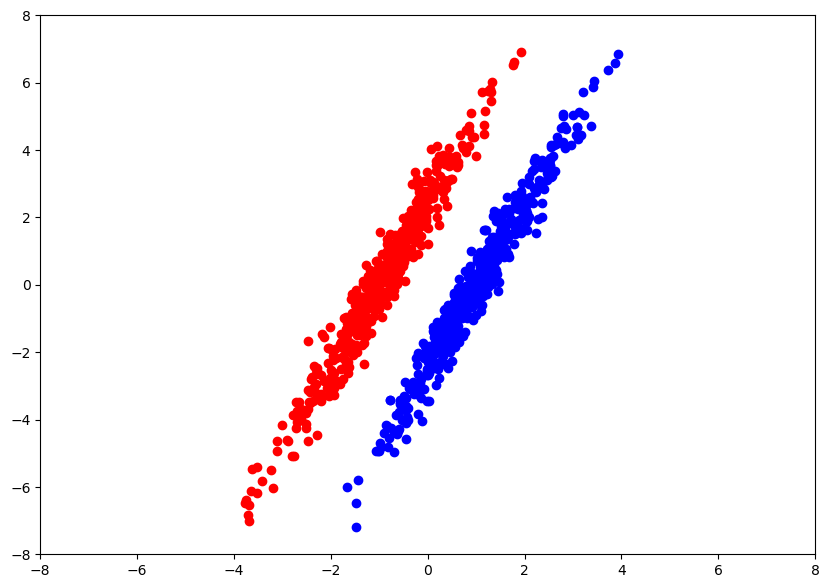

In [79]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
N = 500
e1 = np.random.multivariate_normal(mean=np.array([-1,0]), cov=np.array([[1,2.4],[2.4,6]]), size=N)
e2 = np.random.multivariate_normal(mean=np.array([1,0]), cov=np.array([[1,2.4],[2.4,6]]), size=N)
fig, ax = plt.subplots(figsize=(10, 7))
ax.scatter(e1[:, 0], e1[:, 1], color='red')
ax.scatter(e2[:, 0], e2[:, 1], color='blue')
ax.set_xlim([-8, 8])
ax.set_ylim([-8, 8]);


**5. [0.1 балла]** Сделайте SVD и нарисуйте направления новых признаков.

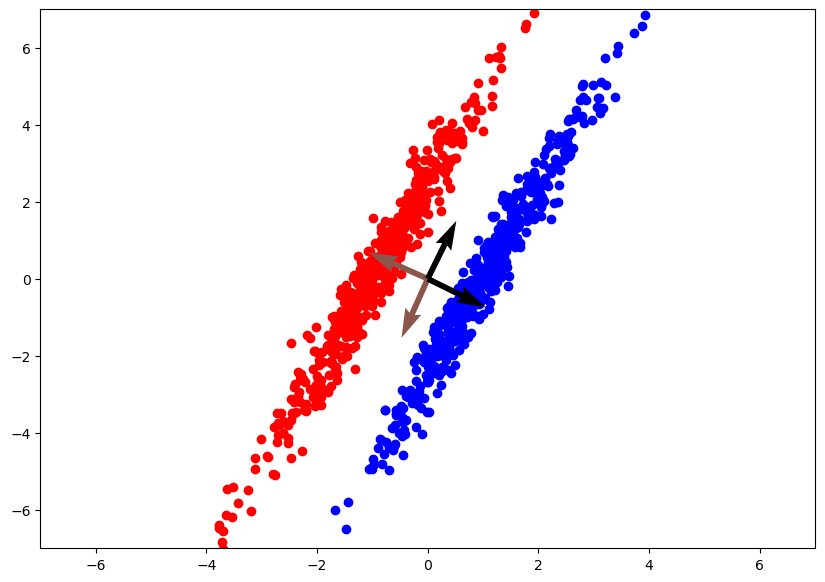

In [80]:
My_U1, My_S1, My_VT1 = svd(e1, full_matrices=False)
My_U2, My_S2, My_VT2 = svd(e2, full_matrices=False)
fig, ax = plt.subplots(figsize=(10, 7))
ax.scatter(e1[:, 0], e1[:, 1], color='red')
ax.scatter(e2[:, 0], e2[:, 1], color='blue')
ax.set_xlim([-7, 7])
ax.set_ylim([-7, 7])

plt.quiver([0,0], [0, 0], My_VT1.T[0, :], My_VT1.T[1, :], scale = 12, color='tab:brown')
plt.quiver([0, 0], [0, 0], My_VT2.T[0, :], My_VT2.T[1, :], scale = 12);

Если бы мы решали задачу анализа данных, то скорее всего нас интересовал признак, который бы разделял два кластера (в данном случае два эллипса), то есть такая функция $f(x)$, для которой
$$f(x) < c,\ \mbox{если объект $x$ из первого класса}$$
$$f(x) > c,\ \mbox{если объект $x$ из второго класса}$$
для некоторого числа $c$.

**6. [0.25 балла]** Помогает ли какой-нибудь из двух предоставленных SVD признаков обнаружить эту структуру? Обязательно поясните свой ответ.

Нет, не помогает. Заметим, что соответствующие вектора из разных выборок параллельны друг другу и являются линейными комбинациями столбцов изначальной матрицы. Из этого следует, что при изменении какого-то признака на величину дельта, значения в обоих выборках одновременно изменятся схожим образом. Таким образом, обнаружить структуру не получится.

In [82]:
# Just keep this image as a sample

**7. [0 баллов]** Сгенерируйте выборку из 1000 точек $x_1,\ldots,x_{1000}$ из нормального распределения с вектором средних $a = (1,1)$ и ковариационной матрицей

$$\Sigma = \begin{pmatrix}
1 & 0\\
0 & 4
\end{pmatrix}.$$

In [27]:
N = 1000
Y = np.random.multivariate_normal(mean=np.array([1,1]), cov=np.array([[1,0],[0,4]]), size=N)

**8. [0.2 балла]** Очевидно, что "интересными" для этого датасета направлениями будут направления полуосей эллипса-облака точек. Глядя только на матрицу $\Sigma$, определите, что это будут за направления? Поясните свой ответ.

Заметим, что $\Sigma = E \Sigma E^T$.

Тк матрица $\Sigma$ - диагональна, данное представление матрицы - это SVD. Значит, направления полуосей лежат в матрице $E^T$ (матрица будет соответствовать ортогональному преобразованию плоскости). Тогда, очевидно, что это вектора (1,0) и (0,1)

**9. [0.1 балла]** Сделайте SVD-разложение $X = U\Sigma V^T$. Нарисуйте все точки $x_i$ на плоскости и направления новых признаков.

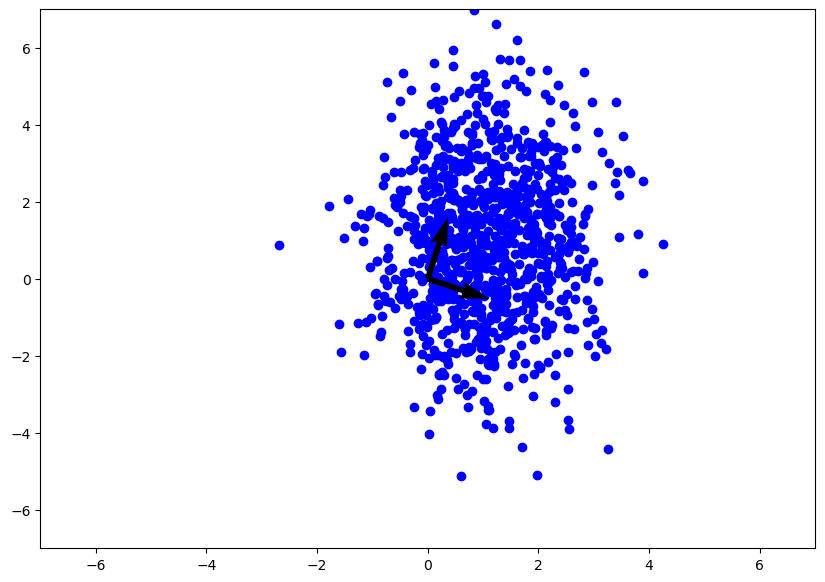

In [53]:
U, S, VT = svd(Y, full_matrices=False)
fig, ax = plt.subplots(figsize=(10, 7))
ax.scatter(Y[:,0], Y[:,1], color='blue')
plt.quiver([0, 0], [0, 0], VT.T[0, :], VT.T[1, :], scale = 12);
ax.set_xlim([-7, 7])
ax.set_ylim([-7, 7]);

**10. [0.4 балла]** Сделайте вывод: в чём проблема и как можно её исправить?

В данном случае направления новых признаков не соответствуют изображению: они указывают неверные направления, в котором сконцентрированы точки.
Эту проблему можно решить предварительно центрировав точки в нуле. Для этого необходимо вычесть средние значения из каждого признака, как мы делали во втором номере. Это позволит сделать верные выводы, применяя метод SVD.